# Description
Twitch is an American video live streaming service that focuses on video game live streaming, including broadcasts of esports competitions, in addition to offering music broadcasts, creative content, and "in real life" streams. Twitch is operated by Twitch Interactive, a subsidiary of Amazon.com, Inc.

# Content
This data consists of different things like number of viewers, number of active viewers, followers gained and many other relevant columns regarding a particular streamer. It has 11 different columns with all the necessary information that is needed.

# Context
This data is from the year 2020, and it's important to consider that it's a year during the pandemic, which significantly boosted the numbers of Twitch streams.

In [55]:
# imports

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score


data= pd.read_csv(r"C:/Users/gonza/Desktop/phyton/Twitch_user_data.csv")

data.head


<bound method NDFrame.head of               Channel  Watch time(Minutes)  Stream time(minutes)  \
0               xQcOW           6196161750                215250   
1            summit1g           6091677300                211845   
2              Gaules           5644590915                515280   
3            ESL_CSGO           3970318140                517740   
4                Tfue           3671000070                123660   
..                ...                  ...                   ...   
995         LITkillah            122524635                 13560   
996  빅헤드 (bighead033)            122523705                153000   
997    마스카 (newmasca)            122452320                217410   
998     AndyMilonakis            122311065                104745   
999              Remx            122192850                 99180   

     Peak viewers  Average viewers  Followers  Followers gained  Views gained  \
0          222720            27716    3246298           1734810      930

# Columns:
Channel: Name of the channel. (object)

Watch time(Minutes): Number of minutes watched. (int)

Stream time(minutes): Number of minutes live streamed. (int)

Peak viewers: Highest number of viewers.(int)

Average viewers: Number of viewers watched on average.(int)

Followers: Total number of followers in the channel.(int)

Followers gained: Number of followers increased over a period of time.(int)

Views gained: Number of views increased over a period of time.(int)

Partnered: Twitch content creator has achieved partner status on the platform.(bool)

Mature: Specifies if the content in the channel is for adults or children. (bool)

Language: Specifies the language in which the channel operates primarily. (object)


In [56]:
data.columns

Index(['Channel', 'Watch time(Minutes)', 'Stream time(minutes)',
       'Peak viewers', 'Average viewers', 'Followers', 'Followers gained',
       'Views gained', 'Partnered', 'Mature', 'Language'],
      dtype='object')

In [57]:
data.describe()


,Watch time(Minutes),Stream time(minutes),Peak viewers,Average viewers,Followers,Followers gained,Views gained
count,1.000000e+03,1000.000000,1000.000000,1000.000000,1.000000e+03,1.000000e+03,1.000000e+03
mean,4.184279e+08,120515.160000,37065.051000,4781.040000,5.700541e+05,2.055185e+05,1.166817e+07
std,5.496355e+08,85376.201364,60314.307686,8453.684965,8.044134e+05,3.399137e+05,2.490572e+07
min,1.221928e+08,3465.000000,496.000000,235.000000,3.660000e+03,-1.577200e+04,1.757880e+05
25%,1.631899e+08,73758.750000,9113.750000,1457.750000,1.705462e+05,4.375825e+04,3.880602e+06
50%,2.349908e+08,108240.000000,16676.000000,2425.000000,3.180630e+05,9.835200e+04,6.456324e+06
75%,4.337399e+08,141843.750000,37569.750000,4786.250000,6.243322e+05,2.361308e+05,1.219676e+07
max,6.196162e+09,521445.000000,639375.000000,147643.000000,8.938903e+06,3.966525e+06,6.701375e+08


In [58]:
#replace with data wrangler 
for i in data.columns:
    if ' ' in i:
        data = data.rename(columns={i:i.replace(' ','_')})
for i in data.columns:
    if '(' in i:
        data = data.rename(columns={i:i.replace('(','_')})
for i in data.columns:
    if ')' in i:
        data = data.rename(columns={i:i.replace(')','_')}) 

In [59]:
#replace bool cols for int
data['Partnered']=data.Partnered.map(lambda p:int(p))
data['Mature']=data.Mature.map(lambda p:int(p))
data.head()


,Channel,Watch_time_Minutes_,Stream_time_minutes_,Peak_viewers,Average_viewers,Followers,Followers_gained,Views_gained,Partnered,Mature,Language
0,xQcOW,6196161750,215250,222720,27716,3246298,1734810,93036735,1,0,English
1,summit1g,6091677300,211845,310998,25610,5310163,1370184,89705964,1,0,English
2,Gaules,5644590915,515280,387315,10976,1767635,1023779,102611607,1,1,Portuguese
3,ESL_CSGO,3970318140,517740,300575,7714,3944850,703986,106546942,1,0,English
4,Tfue,3671000070,123660,285644,29602,8938903,2068424,78998587,1,0,English


In [60]:
#search for nulls
data_null = round(100*(data.isnull().sum())/len(data), 2)
data_null

Channel                 0.0
Watch_time_Minutes_     0.0
Stream_time_minutes_    0.0
Peak_viewers            0.0
Average_viewers         0.0
Followers               0.0
Followers_gained        0.0
Views_gained            0.0
Partnered               0.0
Mature                  0.0
Language                0.0
dtype: float64

# Language Analysis

In [61]:
data['Language'].value_counts()

English       485
Korean         77
Russian        74
Spanish        68
French         66
Portuguese     61
German         49
Chinese        30
Turkish        22
Italian        17
Polish         12
Thai           11
Japanese       10
Czech           6
Arabic          5
Hungarian       2
Slovak          1
Other           1
Greek           1
Finnish         1
Swedish         1
Name: Language, dtype: int64

In [62]:
#group by language and compare with average viewers
plot = data.groupby('Language').Average_viewers.agg(['max','min','mean','count']).sort_values(by='max',ascending=False)
plot

,max,min,mean,count
Language,,,,
English,147643,235,5112.814433,485
Russian,126232,849,6594.229730,74
Spanish,53986,897,6449.691176,68
Korean,39848,529,3913.883117,77
German,33514,326,4278.183673,49
Portuguese,25918,315,3800.934426,61
Chinese,22130,520,3424.800000,30
French,19260,479,3506.530303,66
Japanese,13675,271,4762.600000,10


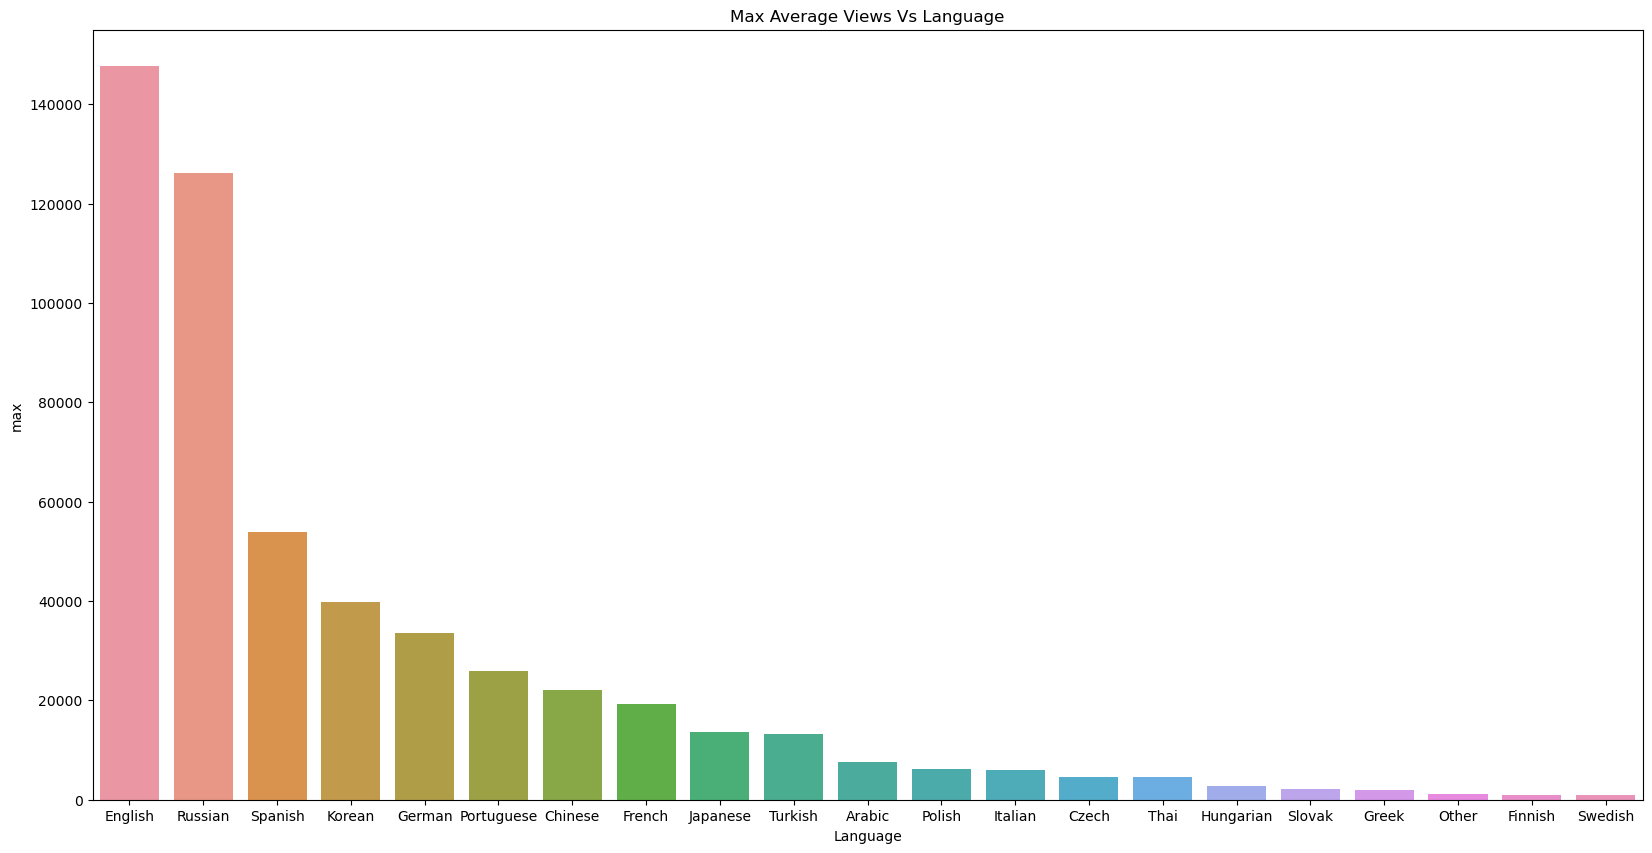

In [63]:
plt.figure(figsize=(20,10))
sns.barplot(x=plot.index, y=plot["max"])
plt.title("Max Average Views Vs Language")
plt.show()

In [64]:
# repeat the code for peak viewers
plot2 = data.groupby('Language').Peak_viewers.agg(['max','min','mean','count']).sort_values(by='max',ascending=False)
plot2

,max,min,mean,count
Language,,,,
English,639375,1182,41639.719588,485
Spanish,538444,3940,53186.985294,68
Russian,457060,3946,44290.013514,74
Portuguese,387315,2445,38463.475410,61
German,288459,4279,31274.734694,49
French,262273,2343,33865.409091,66
Korean,140557,2008,18633.038961,77
Turkish,128345,7471,29991.545455,22
Arabic,116245,15223,58281.400000,5


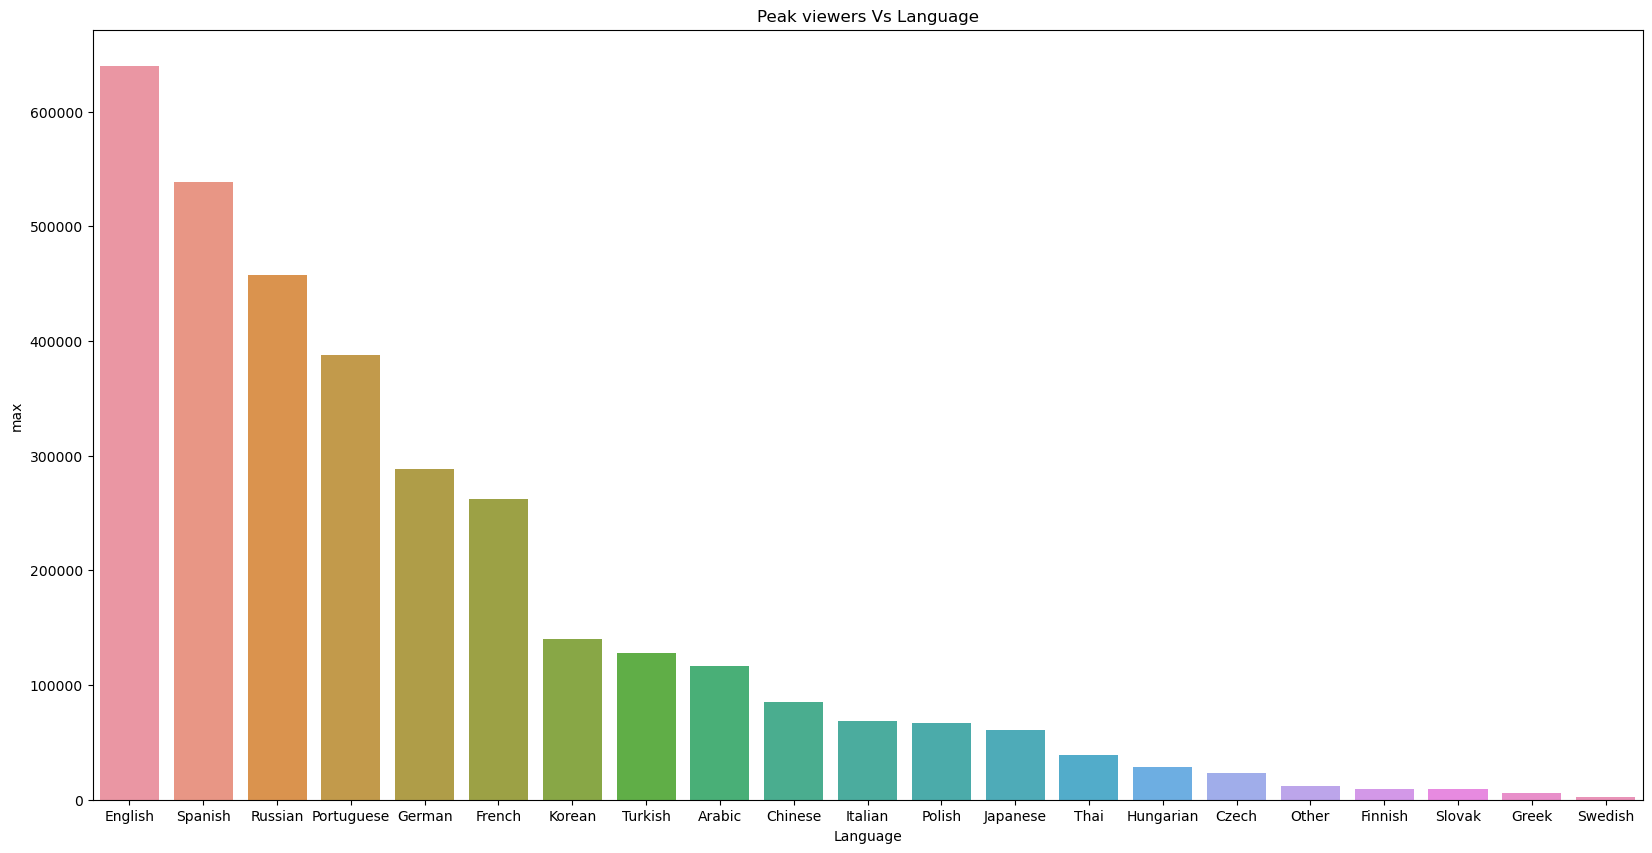

In [65]:
plt.figure(figsize=(20,10))
sns.barplot(x=plot2.index,y=plot2['max'])
plt.title('Peak viewers Vs Language')
plt.show()

Notice that for both the average and peak viewership, the 'English' language takes the top spot. In terms of viewership, Russian has a higher average than Spanish, but its peak viewers are lower. While the average viewership in Spanish is noticeably lower than in English, its peak viewers are very close.

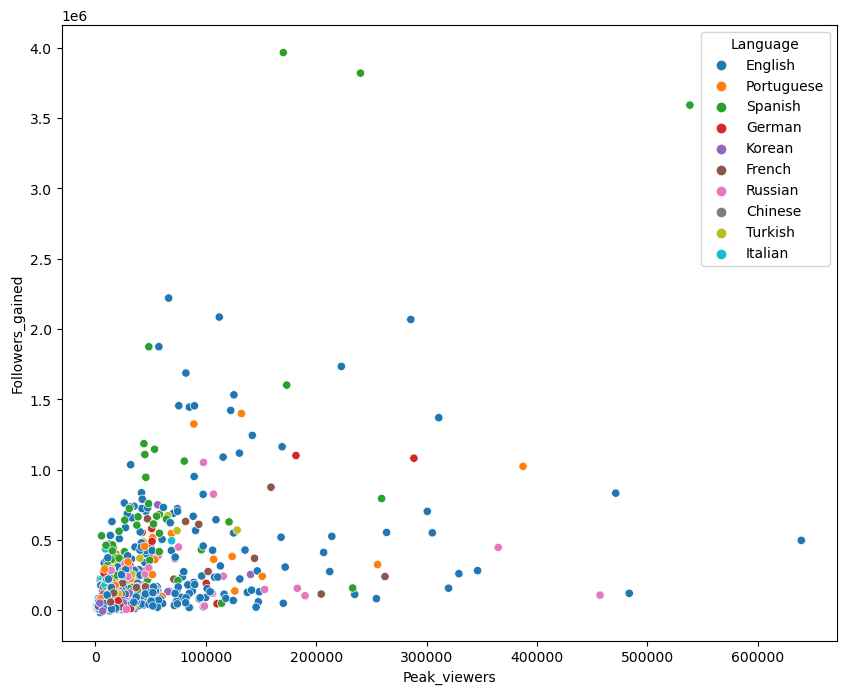

In [66]:
#Due to the large number of languages,
#we took the top 10 to better visualize the graph and gain better insights
top_10_languages = data['Language'].value_counts().head(10).index
filtered_data = data[data['Language'].isin(top_10_languages)]
plt.figure(figsize=(10, 8))
sns.scatterplot(x='Peak_viewers', y='Followers_gained', data=filtered_data, hue='Language')
plt.show()


We can notice that streams in Spanish and in English are the ones that gain the most followers when they reach their peak of views.






<AxesSubplot:>

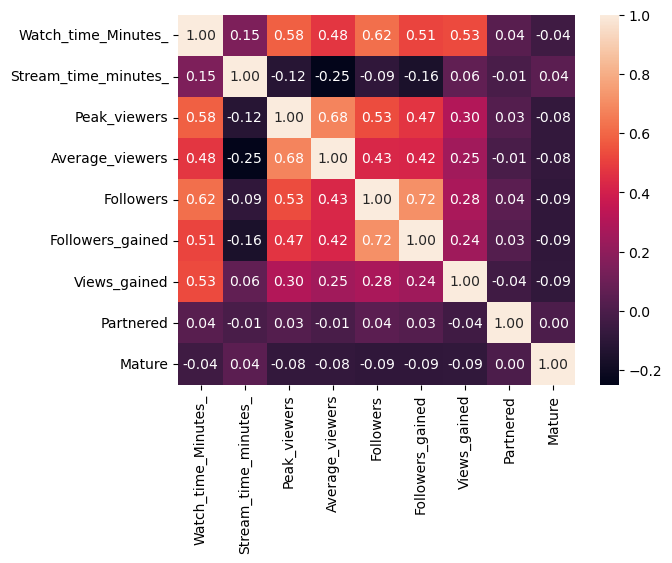

In [67]:
sns.heatmap(data.corr(), annot=True, fmt= '.2f')


Looking at the correlations and considering that the target variable is not marked, I decide to take 'Peak_viewers' and see if it can be predicted using the following columns: 
Watch_time_Minutes_	, 
Average_viewers, 
Followers, 
Followers_gained.


In [68]:
#Drop the columns that will not be taken into account.
df1 = data.drop(['Language'],axis=1)
traindf = df1.drop(columns=['Channel','Stream_time_minutes_','Partnered','Mature','Views_gained'],axis=1)
traindf.head()


,Watch_time_Minutes_,Peak_viewers,Average_viewers,Followers,Followers_gained
0,6196161750,222720,27716,3246298,1734810
1,6091677300,310998,25610,5310163,1370184
2,5644590915,387315,10976,1767635,1023779
3,3970318140,300575,7714,3944850,703986
4,3671000070,285644,29602,8938903,2068424


In [69]:
#Fitting the data and transforming it 

X_train,X_test,y_train,y_test = train_test_split(traindf.drop(['Peak_viewers'],axis=1),traindf['Peak_viewers'],test_size=0.25,random_state=42)

s =StandardScaler()
s.fit(X_train)
X_train = s.transform(X_train)
X_test  = s.transform(X_test)

In [70]:
#creating an instance for the regressor

from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train,y_train)
predic = lr.predict(X_test)
predic

array([ 24876.26538947,  16778.46125625,  19969.27886033,  21518.75845283,
        21618.05950332,  20761.6384612 ,  17988.07586957,  17574.57528651,
        20719.82832893,  39347.00196081,  91912.32906325,  61562.79516056,
        22416.46078745,  25295.17338215,  11664.93586553,  11956.77492785,
        25282.15898294,  14753.66868955,  21536.78720022,  86333.15311885,
        48089.97704626,  44748.67102943,  18078.7728398 ,  20483.00123075,
        44250.09203088,  29821.6535325 ,  52917.14666974,  12498.82988565,
        19349.5927651 ,  13944.67487961,  35791.37044763,  39338.07561035,
        14246.28248774,  29368.45855722,  32614.68913751,  54367.4627845 ,
        16792.5310213 ,  33384.79655952,  17757.02069728,  72013.96343644,
        34206.13090039, 209034.43415313,  26242.60360957,  24044.1523832 ,
        30757.24568255,  25702.72082731,  60710.16918211,  16154.22356174,
        16905.69768158,  10659.09588453,  15593.72793351,  21171.94031199,
        37615.38148665,  

In [71]:
#Checking coef and interception
print("Coef (pendiente):", lr.coef_)
print("Interception:", lr.intercept_)

Coef (pendiente): [12153.87146747 30437.86945293  8162.63978809 -1322.32830953]
Interception: 36935.976


In [72]:
#Checking accuracy
print(r2_score(y_test,predic))

0.6024223672166056


The accuracy is low, and it's not a good model to consider. The purpose of the work was to practice and create a linear regression model and use new tools like the data wrangler in VS Code.

